### Importing libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from collections import Counter
from PIL import Image
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

### Exploratory Data Analysis

#### Reading the data

In [5]:
path='C:/Users/Pravalhika/OneDrive/Desktop/POLLEN GRAIN/Data/'

In [6]:
names=[name.replace(' ','_',).split('_')[0] for name in os.listdir(path)]
classes=Counter(names)

In [7]:
classes

Counter({'arecaceae': 35,
         'arrabidaea': 35,
         'cecropia': 35,
         'chromolaena': 35,
         'combretum': 35,
         'croton': 35,
         'dipteryx': 35,
         'eucalipto': 35,
         'faramea': 35,
         'hyptis': 35,
         'mabea': 35,
         'matayba': 35,
         'mimosa': 35,
         'myrcia': 35,
         'protium': 35,
         'qualea': 35,
         'schinus': 35,
         'senegalia': 35,
         'serjania': 35,
         'syagrus': 35,
         'tridax': 35,
         'urochloa': 35,
         'anadenanthera': 20})

In [8]:
print('no.of images:',len(names))

no.of images: 790


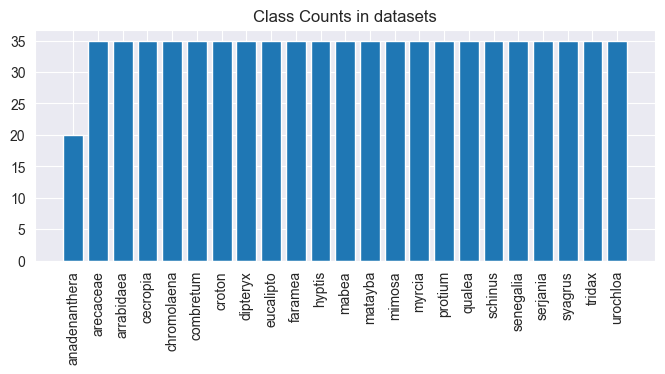

In [9]:
plt.figure(figsize=(8,3))
plt.title('Class Counts in datasets')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

#### Grouping image paths by class label in dataset

In [10]:
path_class={key:[] for key in classes.keys()}
for name in os.listdir(path):
    key=name.replace(' ','_').split('_')[0]
    path_class[key].append(path + name)

#### Visualizing images by class label in a dataset

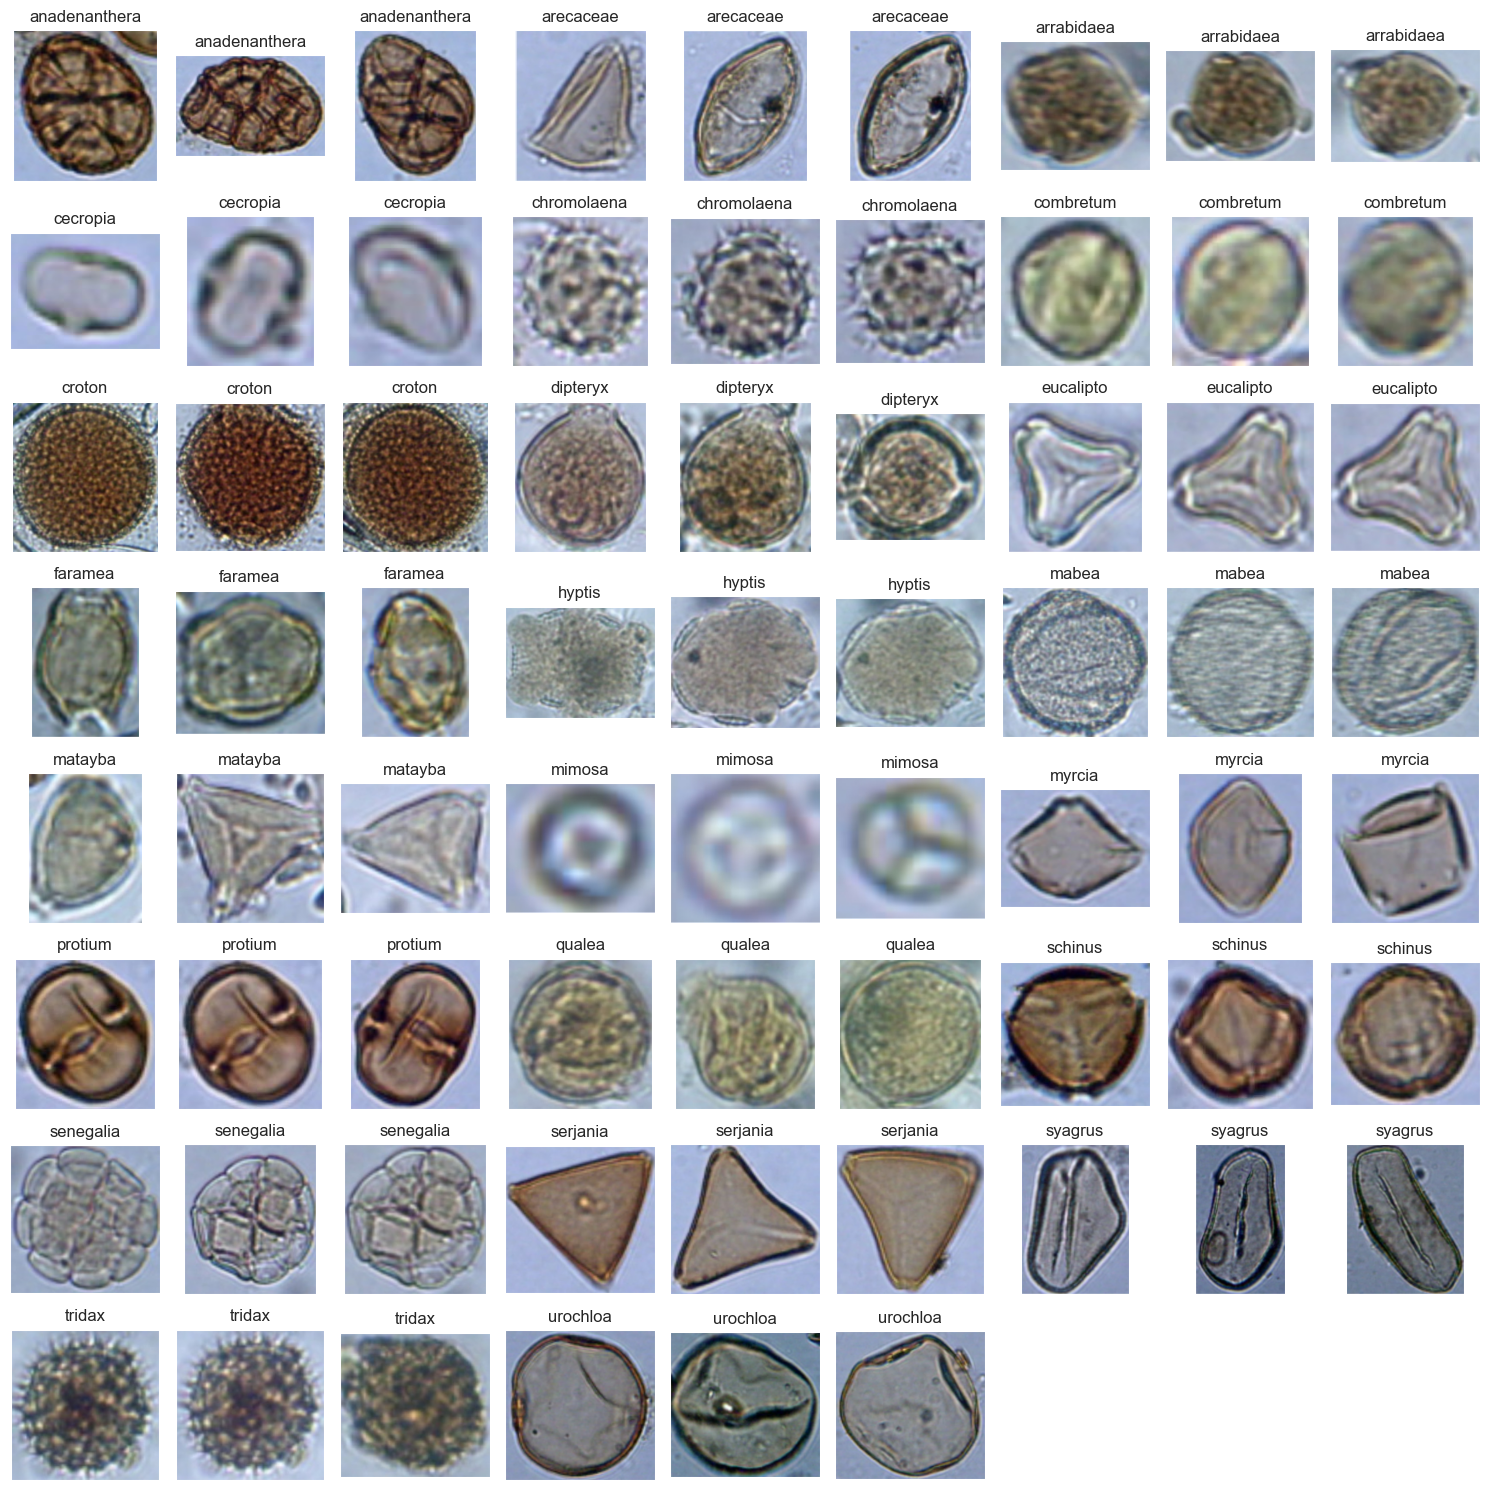

In [11]:
fig=plt.figure(figsize=(15,15))
for i, key in enumerate(path_class.keys()):
    img1=Image.open(path_class[key][0])
    img2=Image.open(path_class[key][1])
    img3=Image.open(path_class[key][2])
    ax=fig.add_subplot(8,9,3*i+1,xticks=[],yticks=[])
    ax.imshow(img1)
    ax.set_title(key)
    ax=fig.add_subplot(8,9,3*i+2,xticks=[],yticks=[])
    ax.imshow(img2)
    ax.set_title(key)
    ax=fig.add_subplot(8,9,3*i+3,xticks=[],yticks=[])
    ax.imshow(img3)
    ax.set_title(key)

plt.tight_layout()
plt.show()

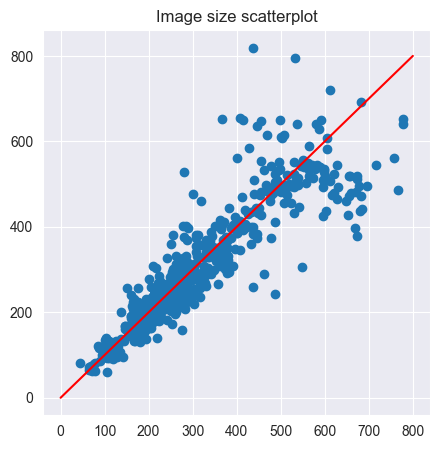

In [12]:
size=[cv2.imread(path+name).shape for name in os.listdir(path)]
x, y, _ = zip(*size)

fig=plt.figure(figsize=(5,5))
# scatter plot
plt.scatter(x,y)
plt.title('Image size scatterplot')

#add diagonal red line
plt.plot([0,800],[0,800],'r')

### Image preprocessing

In [13]:
def process_img(img, size=(128,128)):
    img=cv2.resize(img,size)
    img=img/255
    return img

In [14]:
X, Y=[], []
for name in os.listdir(path):
    img=cv2.imread(path+name)
    X.append(process_img(img))
    Y.append(name.replace(' ','_').split('_')[0])

X=np.array(X)

In [15]:
le=LabelEncoder()
Y_le=le.fit_transform(Y)
Y_cat=to_categorical(Y_le,23)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_cat, test_size=0.285, stratify=Y_le)

In [17]:
print('Images in each class in test set:{}'.format(np.sum(Y_test, axis=0)))

Images in each class in test set:[ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


### Model Building

#### Train The Model

In [18]:
input_shape=X_train[0].shape
output_shape=23

In [19]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=3,  input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(output_shape, activation='softmax'))
model.summary()

C:\Users\Pravalhika\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('Model is compiled!')

Model is compiled!


In [21]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (564, 128, 128, 3)
Y_train shape: (564, 23)
X_test shape: (226, 128, 128, 3)
Y_test shape: (226, 23)


In [22]:
datagener= ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,)

# fit data generator
datagener.fit(X_train)

In [ ]:
batch_size=4
epochs=500

model_path=('cnn3.keras')
callbecks=[EarlyStopping(monitor='val_loss', patience=20),
           ModelCheckpoint(filepath=model_path, save_best_only=True)]

history=model.fit(
    datagener.flow(X_train,Y_train,batch_size=batch_size),
    batch_size=batch_size,
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    validation_data=(X_train,Y_train),
    callbacks=callbecks,
    verbose=1)

Epoch 1/500


C:\Users\Pravalhika\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.0624 - loss: 3.1544 - val_accuracy: 0.0780 - val_loss: 3.0095
Epoch 2/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.0684 - loss: 2.9293 - val_accuracy: 0.0869 - val_loss: 2.7594
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.0869 - loss: 2.7397 - val_accuracy: 0.1401 - val_loss: 2.5674
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.1302 - loss: 2.6284 - val_accuracy: 0.1738 - val_loss: 2.4487
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.1067 - loss: 2.5433 - val_accuracy: 0.1755 - val_loss: 2.3779
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.1587 - loss: 2.5150 - val_accuracy: 0.2199 - val_loss: 2.2296
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.1806 - loss: 2.4021 - val_accuracy: 0.1755 - val_loss: 2.3182
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.1822 - loss: 2.2606 - val_accurac

In [21]:
model.load_weights(model_path)
score=model.evaluate(X_test,Y_test,verbose=0)
print('Test set Accuracy :{}'.format(score[1]))

Test set Accuracy :0.8185840845108032


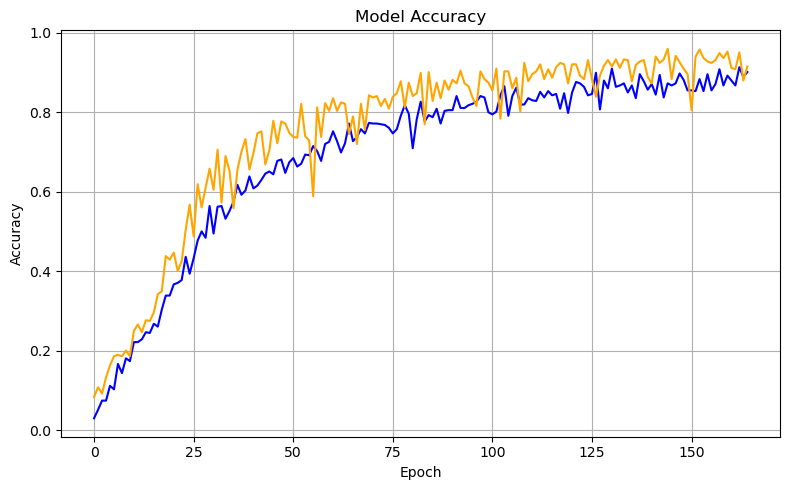

In [22]:
original_data=history.history['accuracy']
generated_data=history.history['val_accuracy']

plt.figure(figsize=(8,5))
plt.plot(original_data,label='Original Trained Data', color='blue')
plt.plot(generated_data,label='Genrated Data', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

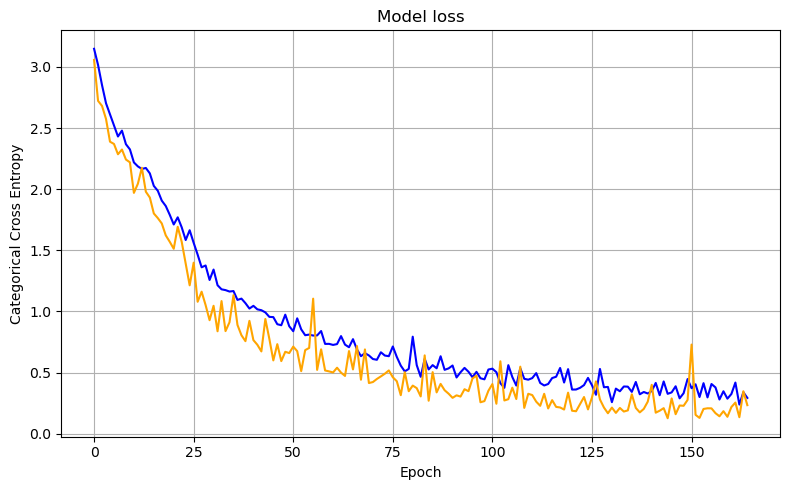

In [23]:
original_data=history.history['loss']
generated_data=history.history['val_loss']

plt.figure(figsize=(8,5))
plt.plot(original_data,label='Original Trained Data', color='blue')
plt.plot(generated_data,label='Genrated Data', color='orange')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross Entropy')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
model.save('model3.h5')

NameError: name 'model' is not defined

In [25]:
img=load_img('C:/content/urochloa (35).jpg', target_size=(128,128))
img.resize((128,128))
# convert to array and preprocess
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
# Predict
a= np.argmax(model.predict(x), axis=1)
index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
result=str(index[a[0]])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


'22'

In [26]:
op=['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipetryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']
result=op[a[0]]
print(result)

urochloa


In [27]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
img=load_img('C:/content/cecropia_32.jpg',target_size=(128,128))
img=img.resize((128,128))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
a=np.argmax(model.predict(x), axis=1)
index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
result=str(index[a[0]])
result
op=['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipetryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']
result=op[a[0]]
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
urochloa


In [32]:
img=load_img('C:/content/arecaceae_32.jpg',target_size=(128,128))
img=img.resize((128,128))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
a=np.argmax(model.predict(x), axis=1)
class_names=['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipetryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']
y_pred=model.predict(x)
class_idx=np.argmax(y_pred, axis=1)[0]
class_name=class_names[class_idx]
print("predicted class index: ", class_idx)
print("predicted class name: ", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
predicted class index:  20
predicted class name:  syagrus


In [30]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
img=load_img('C:/content/combretum_32.jpg',target_size=(128,128))
img=img.resize((128,128))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
a=np.argmax(model.predict(x), axis=1)
index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
result=str(index[a[0]])
result
op=['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipetryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']
result=op[a[0]]
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
serjania
